In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import MultipleLocator

In [2]:
complexity = pd.read_csv('C:/Users/34433/Desktop/MFFT/Courses/MFIN7036 NLP/Group project/complexity_220318.csv')
ticker_industry = pd.read_excel('C:/Users/34433/Desktop/MFFT/Courses/MFIN7036 NLP/Group project/Ticker-Industry.xlsx')

In [3]:
ticker_industry['Company'] = [x.split(':')[-1] for x in ticker_industry['Exchange:Ticker']]
complexity_ind = pd.merge(complexity,ticker_industry.loc[:,['Company','Primary Industry']], how='left',on='Company') 
complexity_ind ['Year'] = [x[:4] for x in complexity_ind['Date']]
complexity_ind ['Quarter'] = [x[4:] for x in complexity_ind['Date']]
complexity_ind = complexity_ind.rename (columns={'Primary Industry':'Industry'})


In [4]:
complexity_ind

,Date,Company,Flesch score,Reading time,Sentence number,Polysyllable number,Polysyllable number per sentence,Children,Industry,Year,Quarter
0,2010Q4,ABT,54.84,906.96,505.0,1750.0,3.44,False,Health Care Equipment,2010,Q4
1,2010Q4,AMD,52.15,374.22,192.0,624.0,3.37,False,Semiconductors,2010,Q4
2,2010Q4,AMZN,16.90,287.55,195.0,440.0,10.09,False,Internet and Direct Marketing Retail,2010,Q4
3,2010Q4,BAC,43.59,769.12,364.0,1266.0,4.85,False,Diversified Banks,2010,Q4
4,2010Q4,CMCSA,61.48,494.19,289.0,894.0,2.45,False,NaN,2010,Q4
...,...,...,...,...,...,...,...,...,...,...,...
2081,2022Q3,NVDA,51.28,534.15,341.0,1067.0,2.98,False,Semiconductors,2022,Q3
2082,2022Q3,WMT,85.01,580.21,379.0,986.0,2.24,False,Hypermarkets and Super Centers,2022,Q3
2083,2022Q4,CRM,54.55,633.73,376.0,1043.0,3.51,False,Application Software,2022,Q4
2084,2022Q4,NVDA,51.19,482.96,294.0,898.0,3.21,False,Semiconductors,2022,Q4


#### Data re-organization for Yannan's portfolio construction
The following codes in this part is to merge sentiment score with complexity score for further analysis.

In [11]:
sentiment = pd.read_csv('C:/Users/34433/Desktop/MFFT/Courses/MFIN7036 NLP/Group project/sentiment_data.csv')
sentiment['TickerQuarter'] = sentiment['Ticker']+sentiment['Quarter']
complexity_ind['TickerQuarter'] = complexity_ind['Company']+complexity_ind['Date']
complexity_ind.query("Company == 'AAPL'")
# merge two dataframes on Quarter number
sentiment_complexity = pd.merge(sentiment,complexity_ind.loc[:,['TickerQuarter','Flesch score','Polysyllable number per sentence']], how='left',on='TickerQuarter')
senti_complex_combine = sentiment_complexity.drop ('TickerQuarter',axis=1)
senti_complex_combine.to_csv("C:/Users/34433/Desktop/MFFT/Courses/MFIN7036 NLP/Group project/senti_complex_combine_220318.csv",index=False)

In [12]:
# We got mean score for each quarter. 
#We would like to see cumulative return in a time series so we insert the mean score of the quarter for each day.
all_factors = pd.read_csv('C:/Users/34433/Desktop/MFFT/Courses/MFIN7036 NLP/Group project/all_factors_220318.csv')
all_factors['Mean']= all_factors['Mean'].fillna(method='pad',axis=0)
all_factors['Total_Words']= all_factors['Total_Words'].fillna(method='pad',axis=0)
all_factors['Sum']= all_factors['Sum'].fillna(method='pad',axis=0)
all_factors['Median']= all_factors['Median'].fillna(method='pad',axis=0)
all_factors['Std']= all_factors['Std'].fillna(method='pad',axis=0)
all_factors['%Positive']= all_factors['%Positive'].fillna(method='pad',axis=0)
all_factors['%Negative']= all_factors['%Negative'].fillna(method='pad',axis=0)
all_factors['%Neutral']= all_factors['%Neutral'].fillna(method='pad',axis=0)
all_factors['Flesch score']= all_factors['Flesch score'].fillna(method='pad',axis=0)
all_factors['Polysyllable number per sentence']= all_factors['Polysyllable number per sentence'].fillna(method='pad',axis=0)

all_factors.to_csv("C:/Users/34433/Desktop/MFFT/Courses/MFIN7036 NLP/Group project/all_factors_value_insert_220318_v2.csv",index=False)

### QoQ & YoY Plot (for one company/industry)

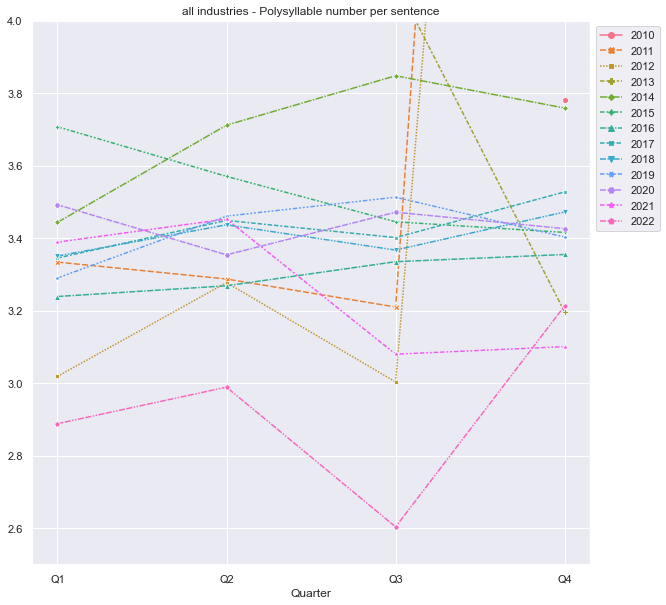

In [18]:
# slice the frame to get a pivot table to view QoQ & YoY change
industry = 'all industries'
factor = 'Polysyllable number per sentence'
#qoq_sliced_frame = complexity_ind.query("Industry == 'Soft Drinks' ")
qoq_sliced_frame = complexity_ind
pivot_flesch = pd.pivot_table(qoq_sliced_frame, values = factor , index = ['Quarter'], columns = ['Year'], aggfunc=np.mean)

# Plot in one figure
sns.set(rc = {'figure.figsize':(10,10)}) # set figure sizess
plt.ylim(ymin=2.5,ymax=4) # set y axis limitation
x_major_locator=MultipleLocator(1) # Set axis density
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
g = sns.lineplot(data=pivot_flesch,markers=True)
g.set(title = industry+" - "+factor)
g.legend(loc="upper left", bbox_to_anchor=(1, 1)) # move legend to a proper position

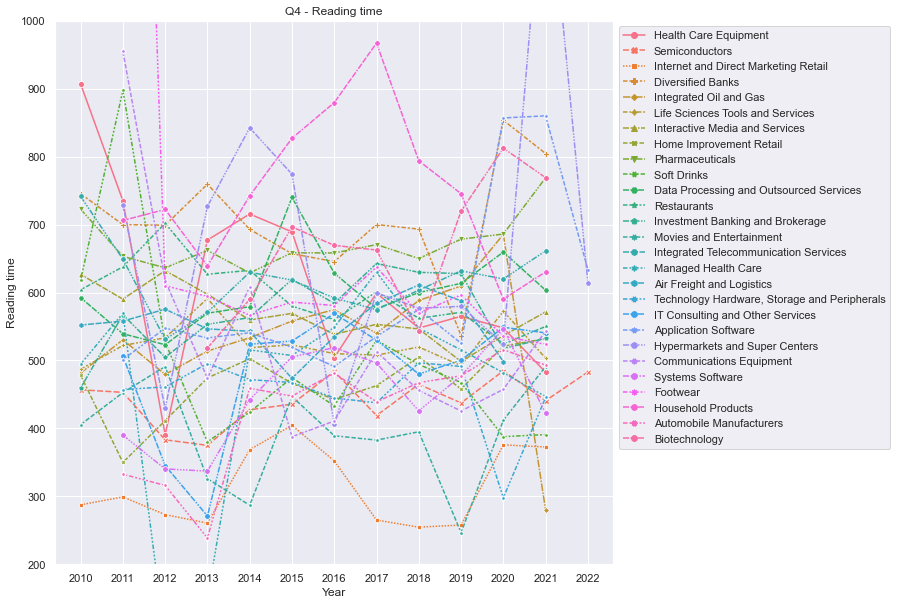

In [62]:
 # To compare the year-end transcripts complexity across industries
Q4_complexity_ind = complexity_ind.query ("Quarter == 'Q4'")
quarter ='Q4'
factor = 'Reading time'
sns.set(rc = {'figure.figsize':(10,10)}) # set figure sizess
plt.ylim(ymin=200,ymax=1000) # set y axis limitation
x_major_locator=MultipleLocator(1) # Set axis density
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
g = sns.lineplot(data=Q4_complexity_ind,x='Year',y=factor, hue='Industry',markers=True, legend='brief',style="Industry",ci=None)
g.set(title = quarter + " - "+ factor)
g.legend(loc="upper left", bbox_to_anchor=(1, 1)) # move legend to a proper position

[Text(0.5, 1.0, 'Polysyllable number per sentence - Industry Comparison')]

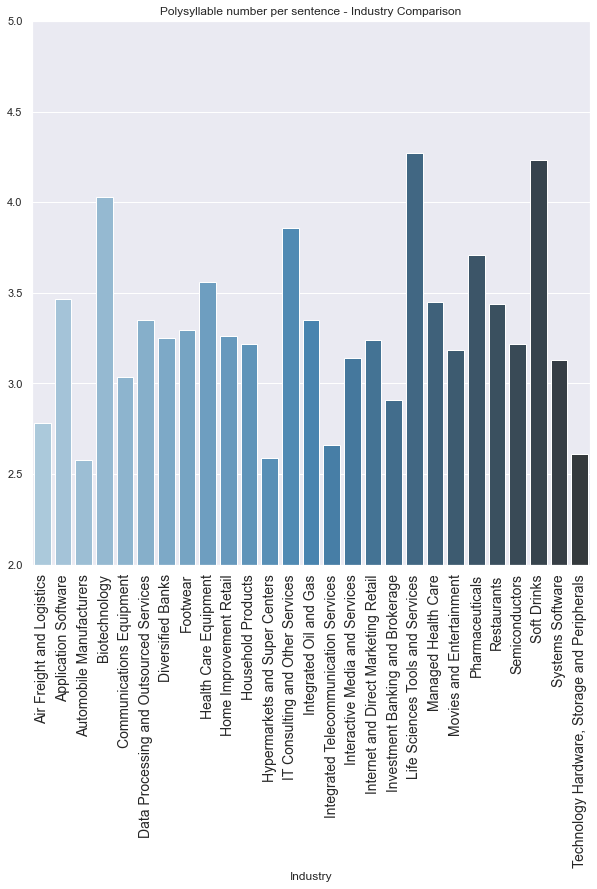

In [20]:
# To compare complexity across industries
factor = 'Polysyllable number per sentence'
all_ind_pivot_flesch = pd.pivot_table(complexity_ind, values = factor, columns = ['Industry'], aggfunc=np.median)
g=sns.barplot( data=all_ind_pivot_flesch,palette="Blues_d")
plt.ylim(ymin=2,ymax=5) # set y axis limitation
plt.xticks(fontsize=14, rotation=90)
g.set(title = factor + " - "+ "Industry Comparison")